In [1]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Dataset BRUT

In [2]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [3]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [4]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
21,-1.526779,-1.670425,-0.746262,-0.858795,-2.454529,-1.645294,-0.772598,-2.916611,-2.424606,0.085724,...,3.591873,-1.781921,-6.717560,-5.694046,2.140976,1.413147,3.309357,0,0,1
44,12.351212,13.101791,12.048355,11.333679,7.107910,5.901230,5.380493,1.744904,0.624420,-1.644089,...,5.097824,5.705948,6.807281,5.539551,6.302109,5.412659,5.693970,0,0,1
193,1.012283,0.595688,0.137192,-0.135742,0.157547,-0.151306,-0.141724,0.334717,-0.341644,0.223389,...,5.794525,3.287796,2.448639,2.656937,2.703613,2.186462,2.361252,0,0,1
122,11.121796,6.916382,-6.183502,2.665466,38.455200,-1.909851,-8.037811,35.449280,37.071350,-8.377777,...,-10.459702,-1.219284,15.719696,-8.211548,-0.133514,38.917114,-6.723557,0,1,0
155,-5.795639,-7.156738,-8.911697,-8.203003,-11.626709,-11.074844,-4.962448,-3.525940,0.169510,-5.692688,...,0.910355,2.503708,2.059570,3.267456,2.000916,0.020920,-0.940353,1,0,0
276,-1.178421,-1.102997,-0.713943,0.783630,1.904114,-1.678802,0.390976,-0.996460,-6.129623,-0.238693,...,1.195267,-8.986069,-4.670517,-1.354553,-0.235260,-1.270752,0.001755,0,0,1
83,-0.309326,-0.062714,-0.189621,-0.071106,-0.114197,-0.178833,-0.139328,-0.144119,-0.072296,-0.201584,...,8.981216,8.986008,8.991989,8.948898,8.956070,8.980011,8.999176,0,0,1
170,0.584915,0.786026,-0.723526,1.322327,-0.244675,0.264084,0.582520,-1.830841,0.437668,-0.888718,...,4.650101,4.836853,4.439407,4.366394,4.421463,4.079086,4.176056,0,0,1
313,-0.097443,2.950378,0.061783,-0.093842,0.565750,1.415695,4.778351,0.675888,5.521759,11.491699,...,14.742859,3.824097,6.859955,5.780167,0.997742,10.909744,7.481247,0,0,1
82,0.094101,0.049805,0.091705,0.054596,0.074951,0.059387,0.061783,0.077347,0.079727,0.060577,...,9.883835,9.901779,9.835938,9.839539,9.852707,9.852707,9.868271,0,0,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
494,9.903137,9.964203,9.153763,8.252335,8.367264,8.755127,10.694427,8.870041,7.641815,11.473740,...,3.328506,0.521301,0.704453,2.625809,2.253510,2.926285,1.499329,0,0,1
391,-9.012253,-8.809937,-8.955978,-8.964355,-9.109207,-10.613968,-10.980286,-10.177032,-10.297928,-5.800430,...,9.796432,9.018326,6.201553,4.926636,4.494476,5.114578,7.038315,0,0,1
87,-0.083069,-0.092651,-0.056732,-0.091446,-0.074692,-0.093842,-0.056732,-0.072296,-0.075882,-0.096237,...,4.353226,4.310120,4.280197,4.295761,4.369980,4.296951,4.290970,0,0,1
497,-9.239700,-9.633545,-8.959579,-12.358139,-13.005768,-9.754456,-11.217300,-10.285965,-8.135971,-8.759659,...,-0.177811,2.101471,2.407928,2.449829,-0.321457,-0.548904,0.729599,0,0,1
164,-7.730148,-12.542496,-11.718887,-7.275253,-7.281235,-9.193008,-10.924011,-11.359756,-7.992310,-5.756134,...,4.106613,4.602219,1.552002,0.532074,5.030777,1.432297,2.176895,1,0,0
252,-0.782181,-0.391922,-0.442200,0.241348,-1.132935,-0.825272,-0.515228,-2.217499,-1.071884,-1.075470,...,10.490753,4.414276,14.353806,8.707077,7.797287,7.772141,5.400681,0,0,1
130,0.528641,-0.297348,-0.735489,-1.571060,-1.063492,-2.082230,-1.336441,-2.189972,-2.841187,-3.309265,...,7.551880,6.051910,8.021133,6.510391,6.648071,5.980087,7.963684,0,0,1
173,0.582520,0.717789,-1.284958,-0.399109,2.321899,0.860245,2.556534,-1.705139,-1.201157,-0.561905,...,2.844879,5.570679,4.590240,4.735092,7.805664,6.786926,5.483292,0,0,1
504,-1.186798,-1.786545,-1.025192,-1.301727,-1.788940,-1.104202,0.133606,-0.169266,-0.900696,-1.869141,...,0.151398,0.387222,0.119080,0.354904,1.674118,2.030853,3.381180,0,0,1
538,1.234940,0.656738,0.639984,0.544205,1.761658,1.036224,1.084106,-1.299332,-5.241379,-0.219543,...,-7.681229,-4.016907,-2.501373,-0.486664,2.352859,-0.190979,-2.096756,0,0,1


,Action
21,S'allonger (depuis position debout)
44,S'assoir (depuis position allongée)
193,S'assoir (chaise)
122,Courrir
155,Marcher
276,S'allonger (depuis position debout)
83,Ne rien faire
170,S'assoir (chaise)
313,Courrir
82,Ne rien faire


,Action
494,S'assoir (depuis position allongée)
391,Se lever (depuis position allongée)
87,Ne rien faire
497,S'assoir (depuis position allongée)
164,Marcher
252,Sauter
130,S'assoir (chaise)
173,S'assoir (chaise)
504,S'assoir (depuis position allongée)
538,S'allonger (depuis position debout)


In [5]:
import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')

hidden_layer_sizes = []
'''
Les range sont choisi à partir d'une méthode itérative ayant indiqué que (95, 68, 78) 
était le meilleur parametre possible
Là on tene un +/- 20
'''
a = np.array(range (1,20))
a = a*10

for i in a : 
    hidden_layer_sizes.append((i,))
    for j in a :
        hidden_layer_sizes.append((i,j))
        #for k in range (58,98) :
        #    hidden_layer_sizes.append((i,j, k))

In [26]:
# affichage des couches de neurones que l'on aura
hidden_layer_sizes

In [7]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(10, 110) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 30) .....................................
[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 180) ....................................
[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] .

[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.1s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.1s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(50, 10) -   0.2s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 130) ....................................
[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 130) ....................................
[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.2s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(60, 160) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 80) .....................................
[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] .

[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(80, 110) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(90, 30) -   0.2s
[CV] hidden_layer_sizes=(90, 30) .....................................
[CV] ............................ hidden_layer_sizes=(90, 30) -   0.1s
[CV] hidden_layer_sizes=(90, 30) .....................................
[CV] ............................ hidden_layer_sizes=(90, 30) -   0.1s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.1s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.1s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(100, 60) -   0.2s
[CV] hidden_layer_sizes=(100, 60) ....................................
[CV] ........................... hidden_layer_sizes=(100, 60) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .

[CV] hidden_layer_sizes=(110, 90) ....................................
[CV] ........................... hidden_layer_sizes=(110, 90) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] h

[CV] ........................... hidden_layer_sizes=(120, 10) -   0.2s
[CV] hidden_layer_sizes=(120, 10) ....................................
[CV] ........................... hidden_layer_sizes=(120, 10) -   0.1s
[CV] hidden_layer_sizes=(120, 10) ....................................
[CV] ........................... hidden_layer_sizes=(120, 10) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.1s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(130, 40) -   0.2s
[CV] hidden_layer_sizes=(130, 40) ....................................
[CV] ........................... hidden_layer_sizes=(130, 40) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 160) ...................................
[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 160) ...................................
[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 160) ...................................
[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(140, 70) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(140, 190) -   0.3s
[CV] hidden_layer_sizes=(140, 190) ...................................
[CV] .......................... hidden_layer_sizes=(140, 190) -   0.3s
[CV] hidden_layer_sizes=(140, 190) ...................................
[CV] .......................... hidden_layer_sizes=(140, 190) -   0.3s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.1s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .

[CV] .......................... hidden_layer_sizes=(150, 110) -   0.2s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.2s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.2s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(160, 20) -   0.2s
[CV] hidden_layer_sizes=(160, 20) ....................................
[CV] ........................... hidden_layer_sizes=(160, 20) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 140) ...................................
[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 140) ...................................
[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 140) ...................................
[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(170, 50) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(170, 170) -   0.3s
[CV] hidden_layer_sizes=(170, 170) ...................................
[CV] .......................... hidden_layer_sizes=(170, 170) -   0.3s
[CV] hidden_layer_sizes=(170, 170) ...................................
[CV] .......................... hidden_layer_sizes=(170, 170) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(190,) -   0.2s
[CV] hidden_layer_sizes=(190,) .......................................
[CV] .............................. hidden_layer_sizes=(190,) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 120) ...................................
[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 120) ...................................
[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 120) ...................................
[CV] .......................... hidden_layer_sizes=(190, 120) -   0.2s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed:  6.4min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(180, 120), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.391 (+/-0.047) for {'hidden_layer_sizes': (10,)}
0.402 (+/-0.030) for {'hidden_layer_sizes': (10, 10)}
0.450 (+/-0.012) for {'hidden_layer_sizes': (10, 20)}
0.592 (+/-0.038) for {'hidden_layer_sizes': (10, 30)}
0.521 (+/-0.014) for {'hidden_layer_sizes': (10, 40)}
0.544 (+/-0.020) for {'hidden_layer_sizes': (10, 50)}
0.586 (+/-0.062) for {'hidden_layer_sizes': (10, 60)}
0.675 (+/-0.042) for {'hidden_layer_sizes': (10, 70)}
0.604 (+/-0.040) for {'hidden_layer_sizes': (10, 80)

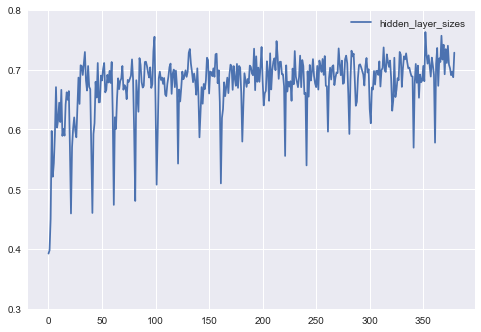

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


# Configuration des valeurs utilisées sur l'axe des abscisses

scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]


# Configuration de la présentation des axes
plt.ylim([0.3,0.8])

axes = plt.gca()




    
plt.plot(scores)
plt.legend(['hidden_layer_sizes'])



In [9]:
clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
clf.fit(source_train, cible_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
for i in range(0,10):
    print("prédit : ", clf.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Marcher'] 
 attendu :  ['Sauter']
prédit :  ['Se lever (chaise)'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position debout)"]


# Dataset ANALYSE

In [11]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed


In [12]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed = train_test_split(source_analysed, cible_analysed, test_size=0.7)


In [13]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
528,4.222900,6.473450,7.469437,7.258743,14.580215,30.217941,13.117355,-11.800293,20.655502,38.461182,...,30.750488,38.461182,-13.357727,-28.766556,-15.196625,-28.766556,14.253105,17.221818,10.471371,14.899019
9,1.092484,-0.044769,0.268875,0.119232,-0.099838,-0.332062,0.110855,0.428085,0.504700,0.915314,...,13.496674,13.496674,-0.332062,4.770233,4.878754,-0.332062,0.410586,1.088526,2.347673,3.488197
102,-13.059647,-12.525742,-8.857819,-6.460022,-3.965271,-3.791687,-6.420517,-9.025421,-7.028656,-5.813599,...,5.756226,5.756226,-13.059647,-12.681107,-0.137100,-13.059647,3.178771,2.509892,1.542949,5.344119
414,-0.558319,-0.479309,-0.197998,-0.139328,0.260498,3.405273,3.708145,6.462677,2.963547,4.374939,...,4.609406,15.074615,-0.558319,-4.843689,-5.976563,-5.976563,4.977073,4.973261,2.816282,4.851159
494,9.903137,9.964203,9.153763,8.252335,8.367264,8.755127,10.694427,8.870041,7.641815,11.473740,...,8.042694,13.104187,-2.223480,-1.084793,-0.984650,-2.223480,4.807152,3.860524,2.206120,3.996998
527,-1.343613,-1.826050,-2.940552,-3.952103,-3.660004,-2.241440,-7.217789,-8.414886,-1.134125,2.707367,...,35.643051,35.643051,-16.003311,-7.526398,-14.862640,-16.003311,6.092846,7.152631,12.449069,10.463179
297,1.546188,2.994675,2.473938,1.951996,0.176697,4.904053,2.569702,7.632248,-2.755005,-1.912247,...,15.720886,21.177689,-12.684952,-4.051208,-7.292175,-12.684952,6.342308,6.457962,6.038379,6.535115
10,0.568146,-0.069901,0.180298,0.136002,-0.092651,-0.121384,-0.365585,0.036636,-0.865982,-1.435791,...,13.509842,13.509842,-1.435791,3.683258,4.590240,-1.435791,0.549432,1.251510,2.508946,3.814469
104,-13.413986,-11.305893,-8.031815,-6.260117,-3.348770,-0.740280,-4.869080,-11.886490,-6.230179,-7.129211,...,4.405899,4.405899,-13.413986,-11.707870,-0.971481,-13.413986,3.635984,1.951163,1.498841,5.344960
130,0.528641,-0.297348,-0.735489,-1.571060,-1.063492,-2.082230,-1.336441,-2.189972,-2.841187,-3.309265,...,13.279999,13.279999,-3.596558,2.367645,5.980087,-3.596558,1.447688,1.281660,2.406855,4.350036


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
240,0.204239,-0.158493,0.414917,0.244934,0.248520,-0.535568,0.015091,-0.048355,0.341904,0.508301,...,10.268097,10.268097,-0.535568,6.228302,3.860016,-0.535568,0.300904,1.043330,1.637550,3.569448
447,0.110855,-0.105820,-0.068710,0.039032,0.022278,0.013901,0.175507,0.316757,-0.405090,0.005508,...,12.516251,12.516251,-0.687607,4.579895,3.511658,-0.687607,0.265284,1.307046,2.413245,3.688526
351,-0.281784,-0.110611,-0.354813,-0.667252,-0.782181,-0.843231,-0.548737,-0.224335,-0.450577,-0.339249,...,3.491302,9.705872,-0.843231,9.341965,2.245132,-0.843231,0.206444,0.102213,0.292193,4.164360
228,0.507095,0.079727,0.066559,0.027069,0.156342,2.004669,-0.329681,-1.579453,-0.721130,-0.403900,...,7.600952,10.227814,-1.579453,7.802490,0.308212,-1.579453,0.791292,0.632523,1.638367,3.927599
564,-1.186798,-1.786545,-1.025192,-1.301727,-1.788940,-1.104202,0.133606,-0.169266,-0.900696,-1.869141,...,3.381180,9.983597,-1.869141,0.606705,-12.914963,-12.914963,0.751426,3.969804,5.372172,5.753781
44,12.351212,13.101791,12.048355,11.333679,7.107910,5.901230,5.380493,1.744904,0.624420,-1.644089,...,6.807281,13.101791,-2.698730,-0.543701,-1.267166,-2.698730,5.621234,3.315087,2.324358,4.196968
268,0.230576,-0.120178,-0.071106,-0.789368,-2.119339,1.290009,0.786026,-1.726685,-2.795700,-2.339600,...,11.248520,12.758484,-2.795700,-1.216476,-9.712708,-9.712708,1.821715,3.209247,6.420935,4.781543
398,10.255096,9.710403,10.046799,9.564362,11.277420,11.482117,10.276642,11.541977,9.052002,11.003281,...,11.770462,11.770462,-2.386292,-2.673340,-4.137817,-4.137817,5.445208,4.625925,4.073901,4.964069
4,-0.215942,-0.227921,0.054596,0.242538,-0.502060,-0.815704,0.562164,-0.844421,-0.509247,-0.293762,...,10.277679,11.051422,-0.903091,4.098648,2.870010,-0.903091,0.728387,1.497415,2.129965,3.662091
556,9.992920,8.859268,10.269455,10.082703,12.818085,9.526062,9.928284,10.109039,12.253052,13.863159,...,6.965302,13.863159,-2.958511,-2.942688,-2.976624,-2.976624,5.675736,4.118893,2.458236,4.620602


,Action
528,Courrir
9,Se lever (chaise)
102,Marcher
414,S'allonger (depuis position assise)
494,S'assoir (depuis position allongée)
527,Courrir
297,Courrir
10,S'assoir (chaise)
104,Marcher
130,S'assoir (chaise)


,Action
240,Se lever (chaise)
447,S'assoir (chaise)
351,Ne rien faire
228,Se lever (chaise)
564,S'assoir (depuis position allongée)
44,S'assoir (depuis position allongée)
268,S'allonger (depuis position debout)
398,Se lever (depuis position allongée)
4,S'assoir (chaise)
556,S'assoir (depuis position allongée)


In [14]:
import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')

hidden_layer_sizes = []
'''
Les range sont choisi à partir d'une méthode itérative ayant indiqué que (95, 68, 78) 
était le meilleur parametre possible
Là on tene un +/- 20
'''
a = np.array(range (1,20))
a = a*10

for i in a : 
    hidden_layer_sizes.append((i,))
    for j in a :
        hidden_layer_sizes.append((i,j))
        #for k in range (58,98) :
        #    hidden_layer_sizes.append((i,j, k))

In [15]:
hidden_layer_sizes

[(10,),
 (10, 10),
 (10, 20),
 (10, 30),
 (10, 40),
 (10, 50),
 (10, 60),
 (10, 70),
 (10, 80),
 (10, 90),
 (10, 100),
 (10, 110),
 (10, 120),
 (10, 130),
 (10, 140),
 (10, 150),
 (10, 160),
 (10, 170),
 (10, 180),
 (10, 190),
 (20,),
 (20, 10),
 (20, 20),
 (20, 30),
 (20, 40),
 (20, 50),
 (20, 60),
 (20, 70),
 (20, 80),
 (20, 90),
 (20, 100),
 (20, 110),
 (20, 120),
 (20, 130),
 (20, 140),
 (20, 150),
 (20, 160),
 (20, 170),
 (20, 180),
 (20, 190),
 (30,),
 (30, 10),
 (30, 20),
 (30, 30),
 (30, 40),
 (30, 50),
 (30, 60),
 (30, 70),
 (30, 80),
 (30, 90),
 (30, 100),
 (30, 110),
 (30, 120),
 (30, 130),
 (30, 140),
 (30, 150),
 (30, 160),
 (30, 170),
 (30, 180),
 (30, 190),
 (40,),
 (40, 10),
 (40, 20),
 (40, 30),
 (40, 40),
 (40, 50),
 (40, 60),
 (40, 70),
 (40, 80),
 (40, 90),
 (40, 100),
 (40, 110),
 (40, 120),
 (40, 130),
 (40, 140),
 (40, 150),
 (40, 160),
 (40, 170),
 (40, 180),
 (40, 190),
 (50,),
 (50, 10),
 (50, 20),
 (50, 30),
 (50, 40),
 (50, 50),
 (50, 60),
 (50, 70),
 (50, 8

In [16]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed.fit(source_train_analysed, cible_train_analysed.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed, cible_pred_analysed = cible_test_analysed, clf_analysed.predict(source_test_analysed)
    print(classification_report(cible_true_analysed, cible_pred_analysed))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.2s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] ............................ hidden_layer_sizes=(20, 50) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 180) ....................................
[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] .

[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] ........................... hidden_layer_sizes=(50, 150) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.2s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 80) .....................................
[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] .

[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(80, 110) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(90, 30) -   0.2s
[CV] hidden_layer_sizes=(90, 30) .....................................
[CV] ............................ hidden_layer_sizes=(90, 30) -   0.2s
[CV] hidden_layer_sizes=(90, 30) .....................................
[CV] ............................ hidden_layer_sizes=(90, 30) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(100, 60) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(120, 10) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] ........................... hidden_layer_sizes=(120, 30) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(120, 130) -   0.3s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.3s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.4s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.4s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.4s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.4s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 160) ...................................
[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 180) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.3s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.3s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.3s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.3s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.3s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(140, 190) -   0.3s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] ........................... hidden_layer_sizes=(150, 10) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.2s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.2s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 140) ...................................
[CV] .......................... hidden_layer_sizes=(160, 140) -   0.2s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.2s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(170, 60) -   0.3s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.3s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.3s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.3s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.3s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.3s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(170, 170) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.2s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.3s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.2s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.3s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 120) ...................................
[CV] .......................... hidden_layer_sizes=(190, 120) -   0.2s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.4s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed:  6.7min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(120, 190), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.337 (+/-0.027) for {'hidden_layer_sizes': (10,)}
0.373 (+/-0.058) for {'hidden_layer_sizes': (10, 10)}
0.491 (+/-0.040) for {'hidden_layer_sizes': (10, 20)}
0.580 (+/-0.024) for {'hidden_layer_sizes': (10, 30)}
0.562 (+/-0.074) for {'hidden_layer_sizes': (10, 40)}
0.598 (+/-0.048) for {'hidden_layer_sizes': (10, 50)}
0.651 (+/-0.031) for {'hidden_layer_sizes': (10, 60)}
0.621 (+/-0.040) for {'hidden_layer_sizes': (10, 70)}
0.609 (+/-0.050) for {'hidden_layer_sizes': (10, 80)

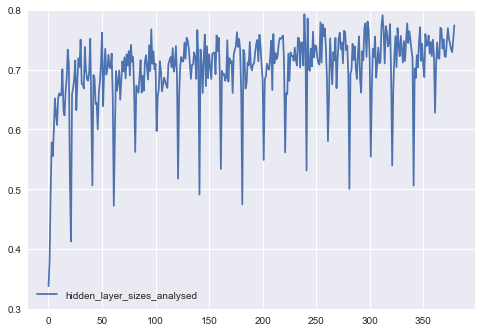

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


# Configuration des valeurs utilisées sur l'axe des abscisses

scores_analysed = [ mean_score.mean() for params, mean_score, mean_score in clf_analysed.grid_scores_ ]


# Configuration de la présentation des axes
plt.ylim([0.3,0.8])

axes = plt.gca()




    
plt.plot(scores_analysed)
plt.legend(['hidden_layer_sizes_analysed'])



In [18]:
# TODO copier coller le best classifier
clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
clf.fit(source_train, cible_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
for i in range(0,10):
    print("prédit : ", clf.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Sauter']
prédit :  ['Se lever (chaise)'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position debout)"]


# Dataset ANALYSE 2

In [20]:

# Récupération des données analysé sans les données brutes (DONNEES ANALYSEES 2)
%store -r colonnes_source_analysed_2
%store -r colonnes_cible_analysed_2
%store -r source_analysed_2
%store -r cible_analysed_2

In [21]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2 = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)


In [22]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_x,moyenne_y,moyenne_z,moyenne_xyz,max_x,max_y,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
405,0,0,1,-5.423817,3.914720,1.894618,0.128507,2.099243,8.618912,7.414215,8.618912,-17.447021,-2.473434,-3.919937,-17.447021,5.773204,4.162653,3.507312,6.053259
51,0,0,1,6.097141,3.186523,2.836436,4.040034,16.483612,9.358719,8.498779,16.483612,-0.449387,-3.410751,-5.162537,-5.162537,4.525748,3.966477,4.752761,4.594495
2,0,0,1,0.603286,4.149772,8.959847,4.570968,1.343872,5.179642,12.541397,12.541397,-0.080673,2.429901,6.154861,-0.080673,0.414755,0.907493,1.593430,3.614473
139,0,0,1,-13.029240,-10.017618,3.240099,-6.602253,6.581192,13.284012,31.208984,31.208984,-39.862732,-38.746780,-9.144089,-39.862732,15.549726,14.493503,9.245506,14.961091
514,0,0,1,-0.551676,5.684154,8.217465,4.449981,0.835098,7.068665,11.648361,11.648361,-2.525162,4.259064,6.712708,-2.525162,0.856165,1.048532,1.254606,3.860704
304,0,0,1,0.148866,7.517036,5.968529,4.544810,5.718079,11.985153,13.572098,13.572098,-5.924927,3.076324,-0.947540,-5.924927,3.026254,2.493072,3.852922,4.468083
271,0,0,1,-0.030158,6.505367,6.126548,4.200586,2.562515,10.807205,12.410904,12.410904,-2.734650,2.988937,-4.888397,-4.888397,1.269066,2.215458,4.341326,4.158640
416,0,0,1,5.763689,3.516806,1.097466,3.459321,19.017868,9.207886,6.245834,19.017868,-1.786545,-3.919525,-5.934662,-5.934662,5.697224,4.795021,3.076043,4.959455
338,0,0,1,0.812777,4.852948,8.599997,4.755241,0.940445,4.959366,8.679550,8.679550,0.718979,4.746292,8.527512,0.718979,0.056576,0.053284,0.043223,3.207102
210,0,0,1,-0.222952,9.397022,2.928374,4.034148,1.626389,10.646790,6.685181,10.646790,-1.441788,8.233444,0.834946,-1.441788,0.744945,0.703796,1.481168,4.165556


,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_x,moyenne_y,moyenne_z,moyenne_xyz,max_x,max_y,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
296,0,0,1,-3.953600,5.045322,1.839610,0.977111,1.291199,14.244080,10.066986,14.244080,-13.269135,-3.030075,-11.262955,-13.269135,5.602178,4.658201,6.036137,6.552226
515,0,0,1,-0.390665,4.686073,8.996776,4.430728,0.823135,5.942184,13.485901,13.485901,-3.548676,3.053589,6.012405,-3.548676,1.247668,0.896373,1.743717,4.087621
221,0,0,1,-0.508400,9.282523,3.374712,4.049611,0.381409,10.342728,6.746231,10.342728,-1.596207,7.789322,1.505325,-1.596207,0.642422,0.625850,1.263485,4.153621
535,0,0,1,3.609505,5.246557,3.291693,4.049252,14.049896,16.714905,8.871078,16.714905,-1.708740,-2.797836,-2.244003,-2.797836,5.441124,5.205450,3.421995,4.772548
371,0,0,1,0.459215,6.204713,5.847083,4.170337,3.151489,13.665878,14.422043,14.422043,-3.748596,0.349335,-5.744324,-5.744324,1.996846,3.776169,5.635208,4.809062
316,0,0,1,2.126237,7.087637,6.940755,5.384876,8.528870,12.924881,12.012268,12.924881,-4.687119,0.209274,-0.514191,-4.687119,3.059795,3.326088,2.872385,3.825910
363,0,0,1,-0.172074,7.356565,6.178860,4.454450,5.308670,11.587723,12.418091,12.418091,-6.786835,2.858459,1.615448,-6.786835,2.638566,2.431620,3.120703,4.289660
180,0,0,1,0.600115,8.416299,4.902451,4.639622,2.345840,9.297668,8.626877,9.297668,-0.832458,6.421036,1.112671,-0.832458,0.805946,0.817930,2.025476,3.483620
234,0,0,1,-0.485119,8.961340,4.175574,4.217265,1.521042,9.478424,6.413437,9.478424,-1.519592,8.476456,2.093094,-1.519592,0.817424,0.385475,1.149713,3.976715
87,0,0,1,-0.081155,8.959544,4.320120,4.399503,-0.056732,8.975647,4.581863,8.975647,-0.104614,8.933746,4.207169,-0.104614,0.013574,0.012092,0.082383,3.722735


,Action
405,S'allonger (depuis position assise)
51,S'allonger (depuis position assise)
2,Se lever (chaise)
139,Sauter
514,Marcher
304,Courrir
271,S'allonger (depuis position debout)
416,S'allonger (depuis position assise)
338,Ne rien faire
210,Se lever (chaise)


,Action
296,S'allonger (depuis position debout)
515,Marcher
221,Se lever (chaise)
535,S'allonger (depuis position debout)
371,Se lever (depuis position allongée)
316,Courrir
363,Se lever (depuis position allongée)
180,S'assoir (chaise)
234,Se lever (chaise)
87,Ne rien faire


In [23]:
import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')

hidden_layer_sizes = []
'''
Les range sont choisi à partir d'une méthode itérative ayant indiqué que (95, 68, 78) 
était le meilleur parametre possible
Là on tene un +/- 20
'''
a = np.array(range (1,20))
a = a*10

for i in a : 
    hidden_layer_sizes.append((i,))
    for j in a :
        hidden_layer_sizes.append((i,j))
        #for k in range (58,98) :
        #    hidden_layer_sizes.append((i,j, k))

In [24]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed_2 = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed_2.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed_2.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed_2.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed_2, cible_pred_analysed_2 = cible_test_analysed_2, clf_analysed_2.predict(source_test_analysed_2)
    print(classification_report(cible_true_analysed_2, cible_pred_analysed_2))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] ............................ hidden_layer_sizes=(20, 50) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] ............................ hidden_layer_sizes=(20, 50) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 170) ....................................
[CV] ........................... hidden_layer_sizes=(20, 170) -   0.2s
[CV] hidden_layer_sizes=(20, 170) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 90) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] ............................... hidden_layer_sizes=(40,) -   0.1s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] ............................... hidden_layer_sizes=(40,) -   0.1s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] ............................... hidden_layer_sizes=(40,) -   0.1s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] .

[CV] ........................... hidden_layer_sizes=(40, 100) -   0.1s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.1s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.1s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.1s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.1s
[CV] hidden_layer_sizes=(40, 120) ....................................
[CV] ........................... hidden_layer_sizes=(40, 120) -   0.2s
[CV] hidden_layer_sizes=(40, 120) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] ........................... hidden_layer_sizes=(50, 150) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] ........................... hidden_layer_sizes=(50, 150) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 70) .....................................
[CV] ............................ hidden_layer_sizes=(60, 70) -   0.1s
[CV] hidden_layer_sizes=(60, 70) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.0s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.1s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] ........................... hidden_layer_sizes=(70, 100) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] ........................... hidden_layer_sizes=(70, 100) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] .

[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.1s
[CV] hidden_layer_sizes=(80, 20) .....................................
[CV] ............................ hidden_layer_sizes=(80, 20) -   0.1s
[CV] hidden_layer_sizes=(80, 20) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(90, 40) -   0.1s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.1s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.1s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.1s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] ............................ hidden_layer_sizes=(90, 50) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] ............................ hidden_layer_sizes=(90, 50) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] ............................ hidden_layer_sizes=(90, 50) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 170) ....................................
[CV] ........................... hidden_layer_sizes=(90, 170) -   0.3s
[CV] hidden_layer_sizes=(90, 170) ....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(110,) .......................................
[CV] .............................. hidden_layer_sizes=(110,) -   0.1s
[CV] hidden_layer_sizes=(110,) .......................................
[CV] .............................. hidden_layer_sizes=(110,) -   0.1s
[CV] hidden_layer_sizes=(110,) .......................................
[CV] .

[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 120) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.1s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] ........................... hidden_layer_sizes=(120, 30) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] ........................... hidden_layer_sizes=(120, 30) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] ........................... hidden_layer_sizes=(120, 30) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(120, 130) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 150) ...................................
[CV] .......................... hidden_layer_sizes=(120, 150) -   0.2s
[CV] hidden_layer_sizes=(120, 150) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 180) ...................................
[CV] .......................... hidden_layer_sizes=(130, 180) -   0.3s
[CV] hidden_layer_sizes=(130, 180) ...................................
[CV] .......................... hidden_layer_sizes=(130, 180) -   0.3s
[CV] hidden_layer_sizes=(130, 180) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.3s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 100) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(150,) -   0.1s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.1s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.1s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] ........................... hidden_layer_sizes=(150, 10) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] ........................... hidden_layer_sizes=(150, 10) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] ........................... hidden_layer_sizes=(150, 10) -   0.0s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 130) ...................................
[CV] .......................... hidden_layer_sizes=(150, 130) -   0.3s
[CV] hidden_layer_sizes=(150, 130) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.3s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.3s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.3s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.3s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.3s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .......................... hidden_layer_sizes=(160, 160) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .......................... hidden_layer_sizes=(160, 160) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 80) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.3s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.3s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.4s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 110) ...................................
[CV] .......................... hidden_layer_sizes=(180, 110) -   0.3s
[CV] hidden_layer_sizes=(180, 110) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .......................... hidden_layer_sizes=(190, 140) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .......................... hidden_layer_sizes=(190, 140) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed:  6.3min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(160, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.355 (+/-0.031) for {'hidden_layer_sizes': (10,)}
0.284 (+/-0.019) for {'hidden_layer_sizes': (10, 10)}
0.450 (+/-0.038) for {'hidden_layer_sizes': (10, 20)}
0.533 (+/-0.033) for {'hidden_layer_sizes': (10, 30)}
0.515 (+/-0.042) for {'hidden_layer_sizes': (10, 40)}
0.538 (+/-0.013) for {'hidden_layer_sizes': (10, 50)}
0.598 (+/-0.028) for {'hidden_layer_sizes': (10, 60)}
0.544 (+/-0.024) for {'hidden_layer_sizes': (10, 70)}
0.645 (+/-0.029) for {'hidden_layer_sizes': (10, 80)

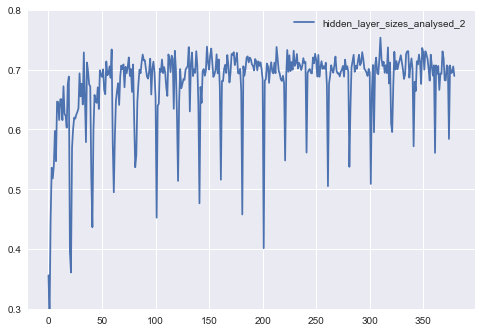

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


# Configuration des valeurs utilisées sur l'axe des abscisses

scores_analysed_2 = [ mean_score.mean() for params, mean_score, mean_score in clf_analysed_2.grid_scores_ ]


# Configuration de la présentation des axes
plt.ylim([0.3,0.8])

axes = plt.gca()




    
plt.plot(scores_analysed_2)
plt.legend(['hidden_layer_sizes_analysed_2'])

